<a href="https://colab.research.google.com/github/aojewola/Hamoye_Stage_C_Quiz_Solution/blob/master/StageC_Quiz_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier 

In [12]:
from google.colab import files
uploaded = files.upload()

Saving Data_for_UCI_named.csv to Data_for_UCI_named.csv


In [52]:
df = pd.read_csv("Data_for_UCI_named.csv")

In [14]:
df.head(5)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [15]:
df.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

In [16]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [17]:
df.describe(include="all")

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unstable
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6380
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731,NaN
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919,NaN
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760,NaN
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557,NaN
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142,NaN
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878,NaN


In [53]:
df.drop("stab", axis=1, inplace=True)

In [89]:
encode = LabelEncoder()

df["stabf"] = encode.fit_transform(df.stabf)

In [91]:
X = df.drop("stabf", axis=1)

In [92]:
y = df["stabf"]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [94]:
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)
#y_train_scale = scaler.fit_transform(np.array(y_train).reshape(-1,1))

normalized_X_train = pd.DataFrame(X_train_scale, columns=X_train.columns)
normalized_X_test = pd.DataFrame(X_test_scale, columns=X_test.columns)
#normalized_y_train = pd.DataFrame(y_train_scale, columns=["stabf"])

In [101]:
rfc = RandomForestClassifier(random_state=1)

rfc.fit(normalized_X_train, y_train)

predict_rfc = rfc.predict(normalized_X_test)

In [127]:
etc = ExtraTreesClassifier(random_state=1)
etc.fit(normalized_X_train, y_train)

predict_etc = etc.predict(normalized_X_test)

In [120]:
lgbm = LGBMClassifier(random_state=1)

lgbm.fit(normalized_X_train, y_train)

predict_lgbm = lgbm.predict(normalized_X_test)

In [118]:
xgb = XGBClassifier(random_state=1)

xgb.fit(normalized_X_train, y_train)

predict_xgb = xgb.predict(normalized_X_test)

In [122]:
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

random_search = RandomizedSearchCV(estimator=etc, param_distributions=hyperparameter_grid, n_iter=10, scoring = 'accuracy', n_jobs = -1, cv = 5, verbose=1, random_state=1)

random_search.fit(normalized_X_train, y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                        

In [123]:
random_search.best_params_

{'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [125]:
etc_tunned = ExtraTreesClassifier(max_features = None,
 min_samples_leaf=8,
 min_samples_split=2, n_estimators=1000, random_state=1)

etc_tunned.fit(normalized_X_train, y_train)

predict_tunned = etc_tunned.predict(normalized_X_test)

In [129]:
#feature importance
importances = pd.DataFrame({'feature': X_train.columns, 'importance':np.round(etc_tunned.feature_importances_,3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

,importance
feature,
tau2,0.141
tau1,0.137
tau3,0.135
tau4,0.135
g3,0.113
g4,0.110
g2,0.108
g1,0.103
p2,0.005


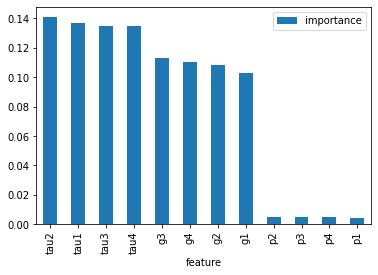

In [130]:
importances.plot.bar()

In [126]:
accuracy_score(y_test, predict_tunned)

0.9285

In [128]:
accuracy_score(y_test, predict_etc)

0.926

Text(0.5, 1.05, 'Confusion_matrix')

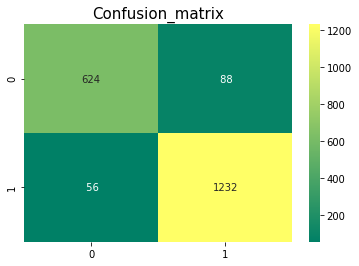

In [110]:
sns.heatmap(confusion_matrix(y_test, predict_rfc), annot=True, fmt='3.0f', cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [112]:
f1_score(y_true=y_test, y_pred=predict_tunned, pos_label= 1)

In [115]:
f1_score(y_true=y_test, y_pred=predict_rfc, pos_label= 1)

0.9447852760736196

In [117]:
accuracy_score(y_true=y_test, y_pred=predict_rfc)

0.928

In [119]:
accuracy_score(y_true=y_test, y_pred=predict_xgb)

0.919

In [121]:
accuracy_score(y_true=y_test, y_pred=predict_lgbm)

0.9355